In [582]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
%matplotlib inline

### Patient-Condition

#### Q1 A. Read all the 3 CSV files as DataFrame and store them into 3 separate variables

In [583]:
normal=pd.read_csv('Part1+-+Normal.csv')
typeH=pd.read_csv('Part1+-+Type_H.csv')
typeS=pd.read_csv('Part1+-+Type_S.csv')

#### Q1 B. Print Shape and columns of all the 3 DataFrames.

In [584]:
print("normal data shape = ",normal.shape)
print("Type H data Shape = ",typeH.shape)
print("Type S Shape = ",typeS.shape)

normal data shape =  (100, 7)
Type H data Shape =  (60, 7)
Type S Shape =  (150, 7)


In [585]:
print("normal Columns = ",normal.columns)
print("Type H Columns = ",typeH.columns)
print("Type S Columns = ",typeS.columns)

normal Columns =  Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
Type H Columns =  Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
Type S Columns =  Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


#### Q1 D. Print DataTypes of all the 3 DataFrames

In [586]:
normal.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [587]:
typeH.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [588]:
typeS.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


All the clolumns for normal, type H and type S seems to be similiar except the "class" column which is respective to the given class.

#### Q1 D. Print DataTypes of all the 3 DataFrames

In [589]:
normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [590]:
typeH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non-null     object 
dtypes: float64(6), object(1)
memory usage: 3.4+ KB


In [591]:
typeS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  150 non-null    float64
 1   P_tilt       150 non-null    float64
 2   L_angle      150 non-null    float64
 3   S_slope      150 non-null    float64
 4   P_radius     150 non-null    float64
 5   S_Degree     150 non-null    float64
 6   Class        150 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


#### Q1 E. Observe and share variation in ‘Class’ feature of all the 3 DaraFrames

In [592]:
normal['Class'].value_counts()

Normal    73
Nrmal     27
Name: Class, dtype: int64

There are values with "Nrmal" class type which can be generalized as "normal"

In [593]:
typeH['Class'].value_counts()

Type_H    37
type_h    23
Name: Class, dtype: int64

There are values with "Type_H" class type which can be generalized as "type_h"

In [594]:
typeS['Class'].value_counts()

Type_S    133
tp_s       17
Name: Class, dtype: int64

We can generalize all type to "type_s"

#### Q2 A. Unify all the variations in ‘Class’ feature for all the 3 DataFrames

In [595]:
normal['Class']='normal'
typeH['Class']='type_h'
typeS['Class']='type_s'

In [596]:
normal['Class'].value_counts()

normal    100
Name: Class, dtype: int64

In [597]:
typeH['Class'].value_counts()

type_h    60
Name: Class, dtype: int64

In [598]:
typeS['Class'].value_counts()

type_s    150
Name: Class, dtype: int64

#### Q2 B. Combine all the 3 DataFrames to form a single DataFrame

In [599]:
df = normal.append([typeH,typeS])

In [600]:
df.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,normal


In [601]:
df.shape

(310, 7)

#### Q2 C. Print 5 random samples of this DataFrame

In [602]:
df.sample(n=5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
85,46.426366,6.620795,48.100000,39.805571,130.350096,2.449382,normal
52,50.209670,29.760122,36.104007,20.449548,128.292515,5.740614,type_h
80,69.563486,15.401139,74.438497,54.162347,105.067356,29.701211,type_s
69,77.236898,16.737622,49.775534,60.499275,110.690377,39.787154,type_s
44,77.409333,29.396545,63.232302,48.012788,118.450731,93.563737,type_s


#### Q2 D. Print Feature-wise percentage of Null values

In [603]:
df. isnull(). sum() * 100 / len(df)

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64

#### Q2 E. Check 5-point summary of the new DataFrame

In [604]:
df.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


#### Q3 A. Visualize a heatmap to understand correlation between all features

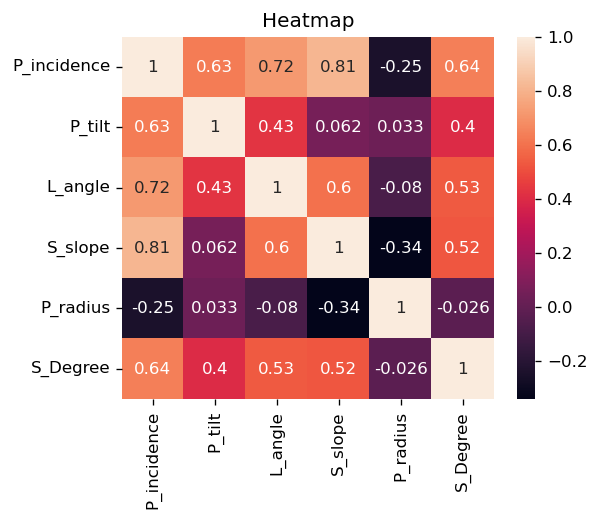

In [605]:
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),annot=True)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Heatmap')
plt.show()

#### Q2 B. Share insights on correlation.
A. Features having stronger correlation with correlation value. - S_Slope and P_incidence have strong correlation 0.81

B. Features having weaker correlation with correlation value. - S_slope and P_radius has weaker correlation -0.34

#### Q3 C. Visualize a pairplot with 3 classes distinguished by colors and share insights

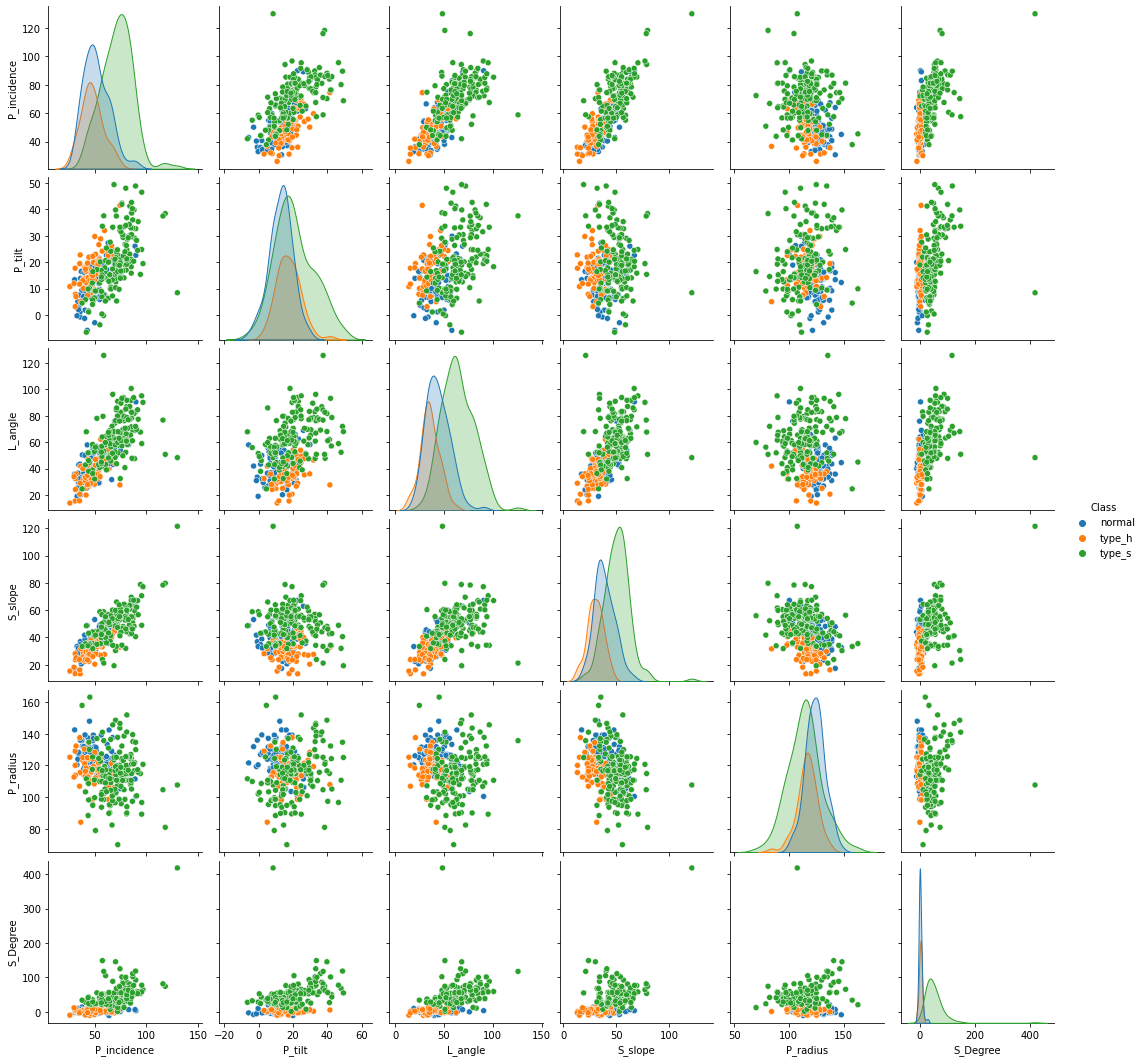

In [606]:
sns.pairplot(df,hue ='Class')
plt.show()

1. type_s class is more distributed than type_h and normal class
2. normal class counts compared to type_h is always seen to be more

#### Q3 D. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights

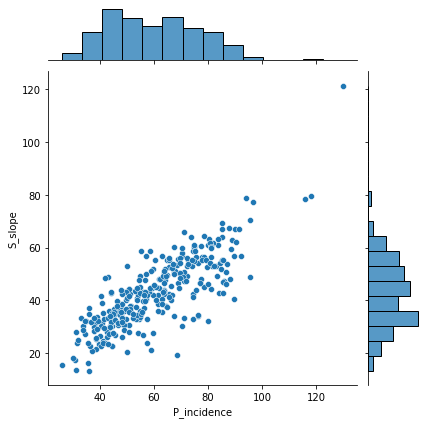

In [607]:
sns.jointplot(data =df, x="P_incidence", y="S_slope")

As we saw in heatmap also S_Slope and P_incidence have strong correlation(0.81), which is evident from the pairplot as well

#### Q3 E. Visualize a boxplot to check distribution of the features and share insights

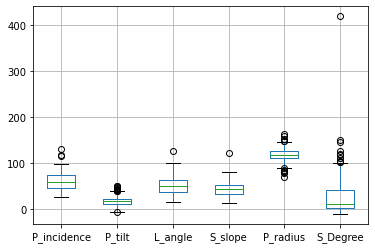

In [608]:
df.boxplot(column=['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree'])
plt.show()

1. Except P_incidence, L_angle and S_slope, rest all features have heavy outliers.
2. Huge outliers potted for S_Degree

#### Q4 A. Split data into X and Y. 

In [609]:
x=df.drop(columns='Class')
y=df['Class'] 

#### Q4 B. Split data into train and test with 80:20 proportion.

In [610]:
#Importing necessary packages
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection

In [611]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 7)

#### Q4 C. Train a Supervised Learning Classification base model using KNN classifier

In [612]:
model = KNeighborsClassifier(n_neighbors= 5, weights = 'distance')

In [613]:
model.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

In [614]:
predicted_labels = model.predict(x_test)
model.score(x_test, y_test)

0.8387096774193549

#### Q4 D. Print all the possible performance metrics for both train and test data

In [615]:
print('Accuracy on Training data:',model.score(x_train, y_train) )
print('Accuracy on Test data:',model.score(x_test, y_test) )

Accuracy on Training data: 1.0
Accuracy on Test data: 0.8387096774193549


Confusion Matrix


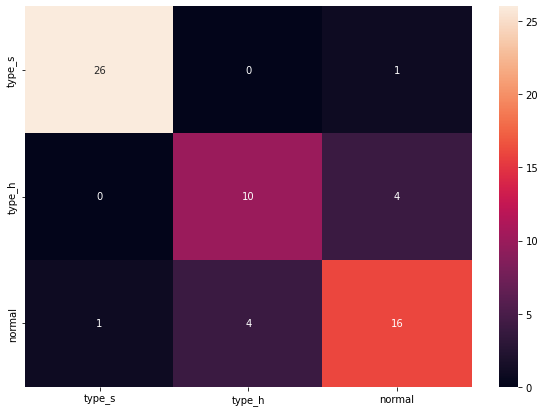

In [616]:
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=["type_s", "type_h","normal"])

df_cm = pd.DataFrame(cm, index = [i for i in ["type_s", "type_h","normal"]],
                  columns = [i for i in ["type_s", "type_h","normal"]])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [617]:
print("Classification  Matrix:\n",classification_report(y_test,predicted_labels))


Classification  Matrix:
               precision    recall  f1-score   support

      normal       0.76      0.76      0.76        21
      type_h       0.71      0.71      0.71        14
      type_s       0.96      0.96      0.96        27

    accuracy                           0.84        62
   macro avg       0.81      0.81      0.81        62
weighted avg       0.84      0.84      0.84        62



"normal" predicted correctly for 76% of time. similary for type_h 71% and type_s 96%-> Precision values

By F1 score we can say that precision and recall is balanced normal and type_h

We have maximum F1 score for type_s.

#### Q5 A. Experiment with various parameters to improve performance of the base model.

In [618]:
train_score=[]
test_score=[]
for k in range(1,50):
    model = KNeighborsClassifier(n_neighbors= k, weights='distance') 
    model.fit(x_train, y_train)
    train_score.append(model.score(x_train, y_train))
    test_score.append(model.score(x_test, y_test))

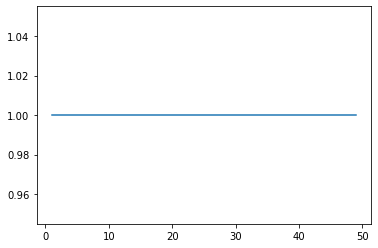

In [619]:
plt.plot(range(1,50),train_score)
plt.show()

Train data prediciton is same for all k value

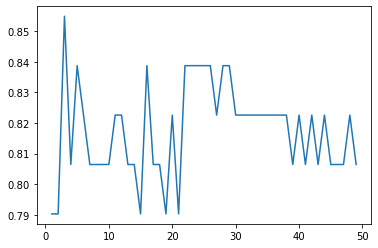

In [620]:
plt.plot(range(1,50),test_score)
plt.show()

Maximum test data accuracy is below 10.

We will try to find the optimum k value.

In [621]:
model = KNeighborsClassifier(n_neighbors= 3, weights='distance')

In [622]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [623]:
predicted_labels = model.predict(x_test)
model.score(x_test, y_test)

0.8548387096774194

#### Q5 B. Clearly showcase improvement in performance achieved.

In [624]:
print('Accuracy on Training data:',model.score(x_train, y_train) )
print('Accuracy on Test data:',model.score(x_test, y_test) )

Accuracy on Training data: 1.0
Accuracy on Test data: 0.8548387096774194


A better prediciton percentage can be seen now.

In [625]:
print("Classification  Matrix:\n",classification_report(y_test,predicted_labels))

Classification  Matrix:
               precision    recall  f1-score   support

      normal       0.73      0.90      0.81        21
      type_h       1.00      0.57      0.73        14
      type_s       0.93      0.96      0.95        27

    accuracy                           0.85        62
   macro avg       0.89      0.81      0.83        62
weighted avg       0.88      0.85      0.85        62



Confusion Matrix


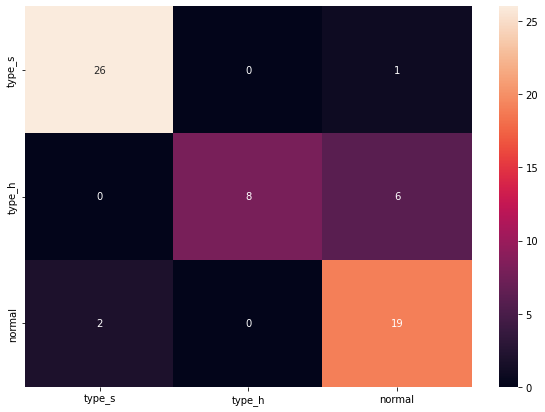

In [626]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=["type_s", "type_h","normal"])

df_cm = pd.DataFrame(cm, index = [i for i in ["type_s", "type_h","normal"]],
                  columns = [i for i in ["type_s", "type_h","normal"]])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

#### Q5 B. Clearly showcase improvement in performance achieved.

We can see precision has increased for k=3 value.